### Dependencies:

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import pylab

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from termcolor import colored
from scipy import stats
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

## Import CSV files

###  Tsunamis Dataset

In [5]:
# Import Historical_Tsunami_Event_Locations file
tsunami_historical_df = pd.read_csv('../csv-files/Historical_Tsunami_Event_Locations.csv',
                                    error_bad_lines=False)
tsunami_historical_df.head()

# Review data
print (" ")
print ("Tsunami data: ")
display(tsunami_historical_df.head(2))

 
Tsunami data: 


,X,Y,TSEVENT_ID,YEAR,DATE_STRIN,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,EVENT_RE_1
0,-177.361,28.215,2194,1990,4/5/90,28.215,-177.361,MIDWAY ISLANDS,HI,USA TERRITORY,80,"E Coast Australia, New Zealand, South Pacific Is."
1,-176.632,51.863,2194,1990,4/5/90,51.863,-176.632,"ADAK, SWEEPER COVE, AK",AK,USA,87,"E Coast Australia, New Zealand, South Pacific Is."


###  Volcanoes Dataset

In [6]:
# Import volcanoes file
volcanos_event = pd.read_csv('../csv-files/volcanoes.csv', error_bad_lines=False)
volcanos_event.head(3)

,Year,Month,Day,Associated Tsunami,Associated Earthquake,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Time,Volcano Explosivity Index (VEI)
0,2014,2,1.0,NaN,NaN,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,U,NaN
1,2014,2,13.0,NaN,NaN,Kelut,Java,Indonesia,-7.930,112.308,1731,Stratovolcano,Historical,D1,NaN
2,2014,11,10.0,NaN,NaN,Kilauea,Hawaiian Is,United States,19.425,-155.292,1222,Shield volcano,Historical,D1,NaN


###  Earthquakes Dataset

In [7]:
# Import earthquakes file
earthquakes_df = pd.read_csv('../csv-files/earthquakes.csv', error_bad_lines=False)
earthquakes_df.head(3)

,date,latitude,longitude,depth,mag,net,updated,place,country,depthError
0,2014-06-07T06:05:29.910Z,40.3731,51.5739,30.51,5.5,us,2015-01-30T18:02:30.249Z,105km E of Artyom,Azerbaijan,3.3
1,2013-07-21T23:45:56.660Z,34.5120,104.2620,8.00,5.9,us,2018-03-13T01:13:03.218Z,13km E of Chabu,China,NaN
2,2013-04-06T00:29:55.090Z,42.7260,130.9760,562.80,5.8,us,2020-01-03T01:39:49.764Z,14km NW of Zarubino,Russia,2.1


### Global Land Temperature Dataset

In [8]:
# Import GlobalLandTemperatures_ByCountry file
GlobalLand_data = pd.read_csv('../csv-files/GlobalLandTemperatures_ByCountry.csv', error_bad_lines=False)
GlobalLand_data.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


<tr>

## Cleaning Datasets

#### Clean Global Land Temperature Data:

In [9]:
# Filter by year (1960-2013)
Global_T_data = GlobalLand_data[(GlobalLand_data['dt'] > '1959-12-31')]
Global_T_data['Year'] = pd.DatetimeIndex(Global_T_data['dt']).year
Global_T_data.reset_index(inplace = True)
Global_T_data.head(3)

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,2594,1960-01-01,-4.380,0.430,Åland,1960
1,2595,1960-02-01,-5.233,0.382,Åland,1960
2,2596,1960-03-01,-2.362,0.638,Åland,1960


In [10]:
# Rename column index to something else to be able drop that column
Global_data_df = Global_T_data.rename(columns={"index": "index_la",
                                                   "AverageTemperature": "avr_temp",
                                                   "Country": "country",
                                                   "Year": "year"})
# Drop colums
global_land_temp1 = Global_data_df.drop(["AverageTemperatureUncertainty",
                                         "index_la", "dt"], axis=1)
# Show unique values in 'country' column
global_land_temp1["country"].unique()
global_land_temp1["year"].unique()

# Grab DataFrame rows where column has certain values
country_list = ["Azerbaijan", "Colombia", "United States", "Italy", "France",
                "Cuba", "Iran", "Egypt", "China", "Turkey", "India", "Russia",
                'Georgia', 'Bulgaria', 'Afghanistan', 'Pakistan', 'Serbia',
                "Mexico", "Japan", "Georgia", "Thailand",
                "Puerto Rico", "Norway", "Indonesia"]

countries_df1 = global_land_temp1[global_land_temp1.country.isin(country_list)]

# Change temperature from celcius to farenheit in avr_temp column
def f(x):
    x = x * 1.8 + 32
    return float(x)
countries_df1['avr_temp'] = countries_df1['avr_temp'].apply(f)

# Group by year to find avr tem per year
countries_grouped1 = countries_df1.groupby(['year']).mean()
countries_grouped1.reset_index(inplace=True)
countries_grouped1.head()

,year,avr_temp
0,1960,59.729574
1,1961,59.768111
2,1962,59.630157
3,1963,59.611667
4,1964,58.928391


In [11]:
# Filter by year (1990-2013)
temp_from_1990 = GlobalLand_data[(GlobalLand_data['dt'] > '1989-12-31')]
temp_from_1990['Year'] = pd.DatetimeIndex(temp_from_1990['dt']).year
temp_from_1990.reset_index(inplace = True)
temp_from_1990.head(3)

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,2954,1990-01-01,0.515,0.359,Åland,1990
1,2955,1990-02-01,3.350,0.629,Åland,1990
2,2956,1990-03-01,3.134,0.231,Åland,1990


In [12]:
# Rename column index to something else to be able drop that column
GlobalLand_clean = temp_from_1990.rename(columns={"index": "index_la",
                                                   "AverageTemperature": "avr_temp",
                                                   "Country": "country",
                                                   "Year": "year"})
# Drop colums
global_land_temp = GlobalLand_clean.drop(["AverageTemperatureUncertainty",
                                         "index_la", "dt"], axis=1)
# Show unique values in 'country' column
global_land_temp["country"].unique()
global_land_temp["year"].unique()

# Grab DataFrame rows where column has certain values
country_list = ["Azerbaijan", "Colombia", "United States", "Italy", "France",
                "Cuba", "Iran", "Egypt", "China", "Turkey", "India", "Russia",
                'Georgia', 'Bulgaria', 'Afghanistan', 'Pakistan', 'Serbia',
                "Mexico", "Japan", "Georgia", "Thailand",
                "Puerto Rico", "Norway", "Indonesia"]

countries_df = global_land_temp[global_land_temp.country.isin(country_list)]

# Change temperature from celcius to farenheit in avr_temp column
def f(x):
    x = x * 1.8 + 32
    return float(x)
countries_df['avr_temp'] = countries_df['avr_temp'].apply(f)

# Group by year to find avr tem per year
countries_grouped = countries_df.groupby(['year']).mean()
countries_grouped.reset_index(inplace=True)
countries_grouped.head()

,year,avr_temp
0,1990,60.593189
1,1991,59.893152
2,1992,59.497661
3,1993,59.581054
4,1994,60.494887


#### Clean Tsunami Data:

In [13]:
# Drop colums from tsunami_historical_df
tsunami_historical = tsunami_historical_df.drop(['X', 'Y', 'DATE_STRIN', 
                                                 'REGION_COD', 'LOCATION_N',
                                                 'AREA', 'REGION_COD',
                                                 'EVENT_RE_1', 'LONGITUDE', 
                                                 'LATITUDE', 'TSEVENT_ID'], axis=1)
# Rename columns
tsunami_historic = tsunami_historical.rename(columns={"YEAR": "year",
                                                      "COUNTRY": "country"})
# Drop rows with missing values
tsunami_event_dff = tsunami_historic.dropna(subset = ["year", "country"])

# Drop all rows which contains year 2014
tsunami_event_df = tsunami_event_dff[tsunami_event_dff.year != 2014]

# Change upper caps to capitalize in country column
tsunami_event_df['country'] = tsunami_event_df['country'].str.capitalize()

# Drop missing rows from country column
tsunami_clean = tsunami_event_df.dropna(subset = ['country'])

# Drop duplicates
tsunami_clean = tsunami_event_df.drop_duplicates()

# Group by year to find how many events happend per year
tsun_event = tsunami_clean.groupby('year').count()
tsun_event.reset_index(inplace=True)
tsun_event.head()

,year,country
0,1990,8
1,1991,9
2,1992,13
3,1993,8
4,1994,12


#### Clean Volcanoes Data:

In [14]:
# Drop colums
volcanos_event_drop = volcanos_event.drop(["Month", "Day", "Associated Tsunami",
                                           "Associated Earthquake", "Location",
                                           "Elevation", "Type", "Status", "Time", 
                                           "Volcano Explosivity Index (VEI)", 
                                           "Latitude","Longitude", "Name"], axis=1)
# Rename columns
volcano_event = volcanos_event_drop.rename(columns={"Year": "year",
                                                    "Country": "country"})

# Because in Global Temp data we have years bellow 2014, 
# we want to keep the same year in volcanoes data to do analyses
volcanos_df = volcano_event[volcano_event.year != 2014]

# Drop rows with missing values
volcanoes_data = volcanos_df.dropna(subset = ["year", "country"])

# Drop duplicates
volcano_clean = volcanoes_data.drop_duplicates()

# Group by year to find count how many events happend per year
volcano_event = volcano_clean.groupby('year').count()
volcano_event.reset_index(inplace=True)
volcano_event.head()

,year,country
0,1990,5
1,1991,5
2,1992,4
3,1993,5
4,1994,3


<tr>

#### Clean Earthquakes Data:

Here we are going to display earthquakes from year (2000 to 2014) with min magnitude 5.5
Data specifically chosen from year 2000 to 2014 - because there to many earthquakes happenning everyday and we won't be able to display them all. For the same reason chosen magnitude (min 5.5), and also we will be able to see most strongest earthquakes.

In [15]:
# Create new column called 'year'
earthquakes_df['year'] = pd.DatetimeIndex(earthquakes_df['date']).year

# Drop columns
earthquakes_df_data = earthquakes_df.drop(["date", "depth", "net", "latitude", "longitude",
                                           "updated", "place", "depthError", "mag"], axis=1)

# Because in Global Temp data we have years bellow 2014, 
# we want to keep the same year in earthquakes data to do analyses
earthquakes_df_dr = earthquakes_df_data[earthquakes_df_data.year != 2014]

# Drop rows with missing values
earthquakes_data = earthquakes_df_dr.dropna(subset = ["year", "country"])

# Drop duplicates
earthquakes_clean = earthquakes_data.drop_duplicates()

# Group by year to find count how many events happend per year
earthquakes_event = earthquakes_clean.groupby('year').count()
earthquakes_event.reset_index(inplace=True)
earthquakes_event.head()

,year,country
0,2000,11
1,2001,7
2,2002,10
3,2003,9
4,2004,15


<tr>

## Create Graphs

**Colors for plots in used:**
<br>

<font color='#C10505'>TrendLine color&#160;&#160;&#160;&#160;&#160;&#160;#C10505 - red</font><br>
<font color='#049A18'>Temp. Change&#160;&#160;&#160;&#160;&#160;&#160;#049A18 - green</font><br>
<font color='#0066cc'>Tsunami&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;#0066cc - blue</font><br>
<font color='#8E4B0F'>Volcano&#160;&#160;&#160;&#160;&#160;&#160;&#160;#8E4B0F - burgundy</font><br>
<font color='#FFA335'>Earthquakes&#160;&#160;&#160;&#160;&#160;&#160;#FFA335 - orange</font><br>

### Global Land Temperature Graph:
Display **-Land Temperture Changes per Year-** graph

(This graph created to show that if we will look intro temperature changes from 1960, we will see big differents between temperatures) <br>
Show on the Plot Global Land Temperature changed from year 1960 to 2013:

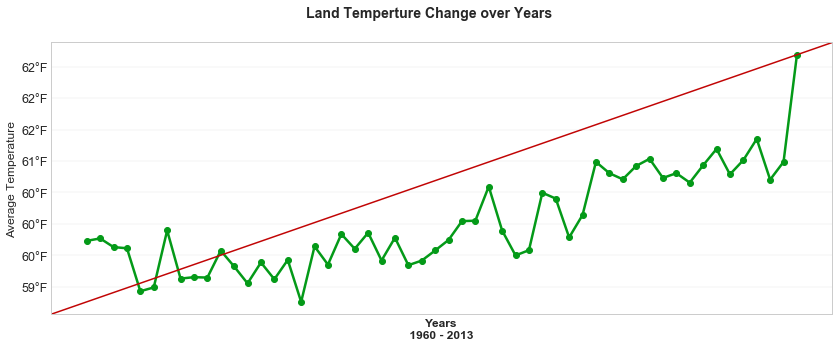

In [16]:
#__________________________________GLOBAL TEMP CHANGE 1960-2013_____________________________________

# Assigning columns 
x = countries_grouped1["year"]
y = countries_grouped1["avr_temp"]

# Creating plot
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(1961, 1993, 2013))
#ax1.set_xticks(np.arange(y))
ax1.plot(y, color="#049A18", label="high_wage", linewidth=2.5, marker='o')
ax1.set_xticklabels(x)

# Creating line plot
line = mlines.Line2D([0, 1], [0, 1], color='#C10505')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Giving parameters to the ticks 
ax1.tick_params(axis="x", labelsize=12.5, color="black")
ax1.tick_params(axis="y", labelsize=12.5, color="black")

# Adding % sign to the yaxis ticks
fmt = '{x:,.0f}°F'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Creating title and labels
fig.suptitle("Land Temperture Change over Years", fontsize=14, fontweight="bold")
plt.ylabel("Average Temperature",fontsize=12)
plt.xlabel("Years " + str()+'\n 1960 - 2013 '+str(), fontsize=12, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Global_Temp_Change_1960_2013.png")
plt.show()

On this graph we will cut amount of year because of our other datas that we will be compairing Global Temperature Change. <br>
Show on the Plot Global Land Temperature changed from year 1990 to 2013:

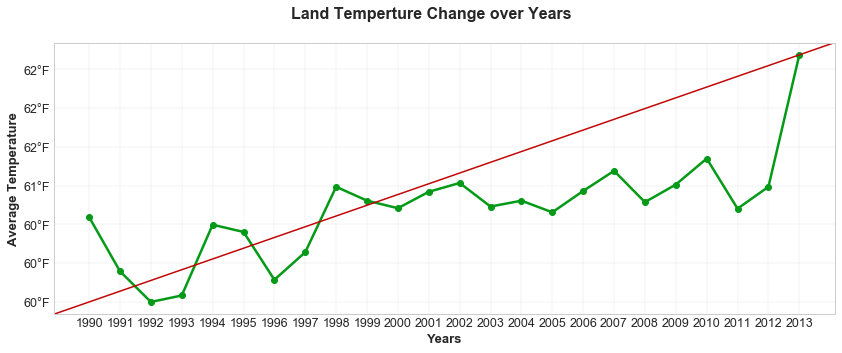

In [17]:
#__________________________________GLOBAL TEMP CHANGE 1990 to 2013_____________________________________

# Assigning columns 
x = countries_grouped["year"]
y = countries_grouped["avr_temp"]

# Creating plot
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(len(x)))
ax1.plot(y, color="#049A18", linewidth=2.5, marker='o', ls = "-")
ax1.set_xticklabels(x)

# Creating line plot
line = mlines.Line2D([0, 1], [0, 1], color='#C10505')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Giving parameters to the ticks 
ax1.tick_params(axis="x", labelsize=12.5, color="black")
ax1.tick_params(axis="y", labelsize=12.5, color="black")

# Adding % sign to the yaxis ticks
fmt = '{x:,.0f}°F'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Creating title and labels
fig.suptitle("Land Temperture Change over Years", fontsize=16, fontweight="bold")
plt.ylabel("Average Temperature",fontsize=13, fontweight="bold")
plt.xlabel("Years", fontsize=13, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Global_Temp_Change_1990_2013.png")
plt.show()

<tr>

### Tsunamis Graph: 
Display **-Number of Tsunamis per Year-** graph

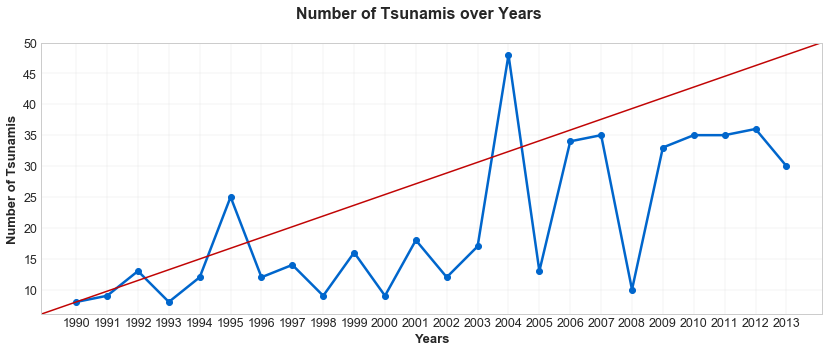

In [18]:
#_________________________________________TSUNAMI_____________________________________

# Assigning columns 
x_x = tsun_event["year"]
y_y = tsun_event["country"]

# Creating plot
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(len(x_x)))
#ax1.set_xticks(np.arange(y_y))
ax1.plot(y_y, color="#0066cc", label="", linewidth=2.5, marker='o')
ax1.set_xticklabels(x_x)

# Creating line plot
line = mlines.Line2D([0, 1], [0, 1], color='#C10505')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Giving parameters to the ticks 
ax1.tick_params(axis="x", labelsize=12.5, color="black")
ax1.tick_params(axis="y", labelsize=12.5, color="black")

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Creating title and labels
fig.suptitle("Number of Tsunamis over Years", fontsize=16, fontweight="bold")
plt.ylabel("Number of Tsunamis", fontsize=13, fontweight="bold")
plt.xlabel("Years", fontsize=13, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Tsunamis_over_Years.png")
plt.show()

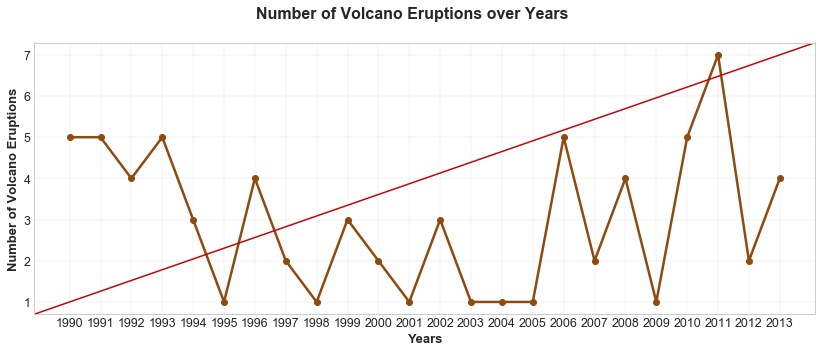

In [19]:
#_________________________________________VOLCANO_____________________________________

# Assigning columns 
xx_x = volcano_event["year"]
yy_y = volcano_event["country"]

# Creating plot
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(len(xx_x)))
ax1.plot(yy_y, color="#8E4B0F", label="", linewidth=2.5, marker='o')
ax1.set_xticklabels(xx_x)

# Creating line plot
line = mlines.Line2D([0, 1], [0, 1], color='#C10505')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Giving parameters to the ticks 
ax1.tick_params(axis="x", labelsize=12.5, color="black")
ax1.tick_params(axis="y", labelsize=12.5, color="black")

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Creating title and labels
fig.suptitle("Number of Volcano Eruptions over Years", fontsize=16, fontweight="bold")
plt.ylabel("Number of Volcano Eruptions", fontsize=13, fontweight="bold")
plt.xlabel("Years", fontsize=13, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Volcanoes_over_Years.png")
plt.show()

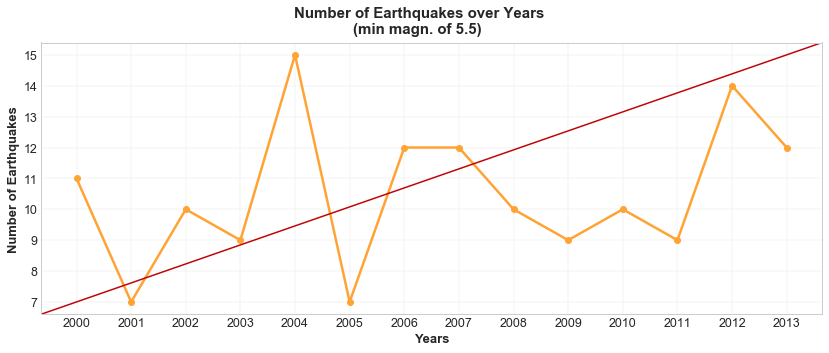

In [20]:
#_________________________________________Earthquakes_____________________________________

# Assigning columns 
xx_xx = earthquakes_event["year"]
yy_yy = earthquakes_event["country"]

# Create plot
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(111)
ax1.set_xticks(np.arange(len(xx_xx)))
#ax1.set_xticks(np.arange(y_y))
ax1.plot(yy_yy, color="#FFA335", label="", linewidth=2.5, marker='o')
ax1.set_xticklabels(xx_xx)

# Creating line plot
line = mlines.Line2D([0, 1], [0, 1], color='#C10505')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Giving parameters to the ticks 
ax1.tick_params(axis="x", labelsize=12.5, color="black")
ax1.tick_params(axis="y", labelsize=12.5, color="black")

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Creating title and labels
fig.suptitle("Number of Earthquakes over Years" + str()+'\n(min magn. of 5.5) '+str(),
             fontsize=15, fontweight="bold")
plt.ylabel("Number of Earthquakes", fontsize=13, fontweight="bold")
plt.xlabel("Years", fontsize=13, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Earthquakes_over_Years.png")
plt.show()

<tr>

**Show on the graph how Global Land Temperature Change reacted for numbers of Tsunamies  over the years.** <br>
To fit yaxis and ylabels on the graph, we will move yaxis to the right side.

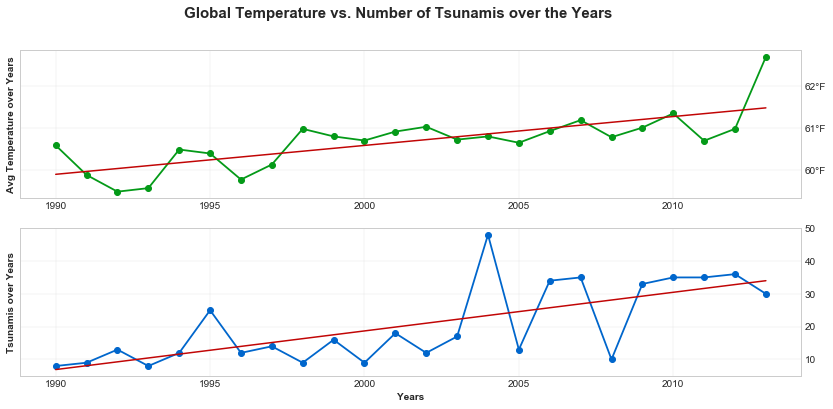

In [21]:
#__________________________________GLOBAL TEMP CHANGE_____________________________________

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(211)
ax1.plot(x, y, color="#049A18", linewidth=1.8, marker='o', ls='-')
ax1.yaxis.tick_right()

# Adding % sign to the yaxis ticks
fmt = '{x:,.0f}°F'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r-", color="#C10505")


# Creating title and labels
fig.suptitle("Global Temperature vs. Number of Tsunamis over the Years", fontsize=15, fontweight="bold")
plt.ylabel("Avg Temperature over Years", fontsize=10, fontweight="bold")

#___________________________________TSUNAMI over the years______________________________________

ax2 = plt.subplot(212)
ax2.plot(x, y_y, color="#0066cc", linewidth=1.8, marker='o', ls='-')
ax2.yaxis.tick_right()

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(x_x, y_y, 1)
p = np.poly1d(z)
pylab.plot(x_x,p(x_x),"r-", color="#C10505")


# Creating title and labels
plt.ylabel("Tsunamis over Years", fontsize=10, fontweight="bold")
plt.xlabel("Years", fontsize=10, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Temp_Change_vs_Tsunamis_over_Year.png")
plt.show()

<tr>

**Show on the graph how Global Land Temperature Change reacted for numbers of Volcanoes over the years.** <br>
To fit yaxis and ylabels on the graph, we will move yaxis to the right side.

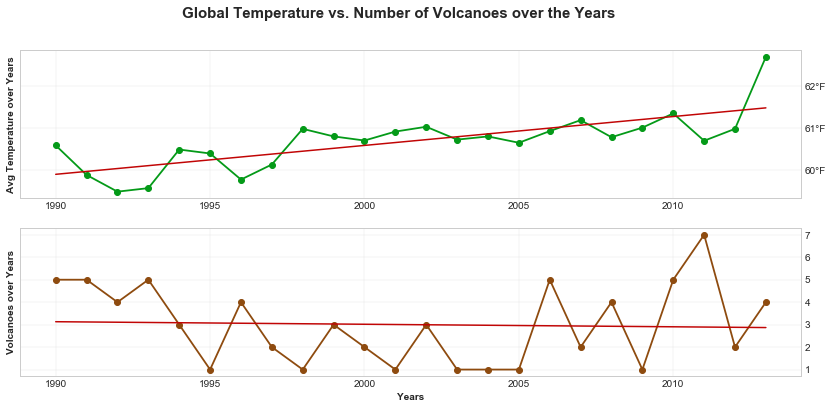

In [22]:
#__________________________________GLOBAL TEMP CHANGE_____________________________________

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(211)
ax1.plot(x, y, color="#049A18", linewidth=1.8, marker='o', ls='-')
ax1.yaxis.tick_right()

# Adding % sign to the yaxis ticks
fmt = '{x:,.0f}°F'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r-", color="#C10505")

# Creating title and labels
fig.suptitle("Global Temperature vs. Number of Volcanoes over the Years", fontsize=15, fontweight="bold")
plt.ylabel("Avg Temperature over Years", fontsize=10, fontweight="bold")


#_________________________________________Volcanoes over the years_____________________________________

ax2 = plt.subplot(212)
#ax2.set_xticks(np.arange(len(x_x)))
ax2.plot(x, yy_y, color="#8E4B0F", linewidth=1.8, marker='o', ls='-')
ax2.yaxis.tick_right()

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(xx_x, yy_y, 1)
p = np.poly1d(z)
pylab.plot(xx_x,p(xx_x),"r-", color="#C10505")

# Creating labels
plt.ylabel("Volcanoes over Years", fontsize=10, fontweight="bold")
plt.xlabel("Years", fontsize=10, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Temp_Change_vs_Volcanoes_over_Year.png")
plt.show()

<tr>

 Now that we will be comparing Earthquakes with Global Temperature Change we need to create one more DataFrame for Global Temperature with the same amount of year that in Earthquakes data, to be able to see changes just for those years.
 <br>
 **Show on the graph how Global Land Temperature Change reacted for numbers of Earthquakes with 5.5 mag and higher. <br> 
 From years 2000 to 2013.** <br>
 To fit yaxis and ylabels on the graph, we will move yaxis to the right side.

In [23]:
# Filter data to have values in year column only from 2000 to 2013
global_temp_vol = countries_grouped[countries_grouped.year > 1999]
global_temp_vol.reset_index(inplace = True)
global_temp_vol

# Rename columns
clean_years = global_temp_vol.rename(columns={"index": "indexx"})

# Drop colums
glob_temp = clean_years.drop(["indexx"], axis=1)
glob_temp.head(2)

,year,avr_temp
0,2000,60.708174
1,2001,60.920176


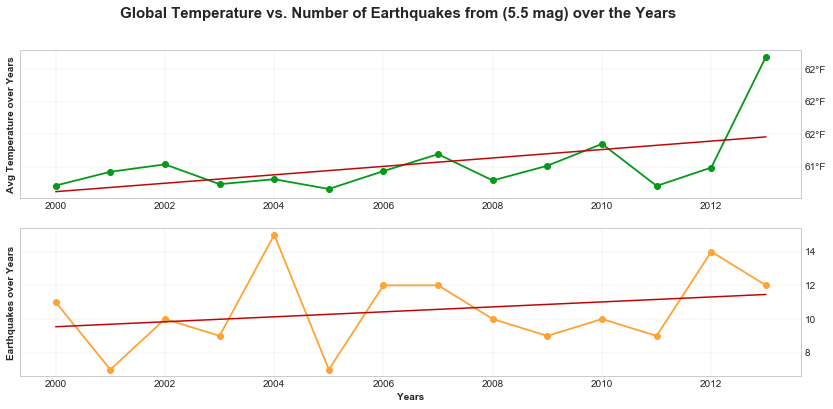

In [24]:
# Assigning columns 
xy = glob_temp["year"]
yx = glob_temp["avr_temp"]

#__________________________________GLOBAL TEMP CHANGE_____________________________________

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(211)
ax1.plot(xy, yx, color="#049A18", linewidth=1.8, marker='o', ls='-')
ax1.yaxis.tick_right()

# Adding % sign to the yaxis ticks
fmt = '{x:,.0f}°F'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(xy, yx, 1)
p = np.poly1d(z)
pylab.plot(xy,p(xy),"r-", color="#C10505")

# Creating title and labels
fig.suptitle("Global Temperature vs. Number of Earthquakes from (5.5 mag) over the Years", 
             fontsize=15, fontweight="bold")
plt.ylabel("Avg Temperature over Years", fontsize=10, fontweight="bold")


#_________________________________________Earthquakes over the years_____________________________________

ax2 = plt.subplot(212)
ax2.plot(xy, yy_yy, color="#FFA335", linewidth=1.8, marker='o', ls='-')
ax2.yaxis.tick_right()

# Set up grid
plt.grid(True, which='major', lw=0.2)

# Add TrendLine
z = np.polyfit(xx_xx, yy_yy, 1)
p = np.poly1d(z)
pylab.plot(xx_xx,p(xx_xx),"r-", color="#C10505")

# Creating labels
plt.ylabel("Earthquakes over Years", fontsize=10, fontweight="bold")
plt.xlabel("Years", fontsize=10, fontweight="bold")

# Save our graph and show the grap
plt.savefig("../Images/Temp_Change_vs_Earthquakes_over_Year.png")
plt.show()

In [25]:
# Save DataFrames to CSV file
countries_grouped.to_csv(r'../csv-files/output_data/avr_temp_from_1990_df.csv')
countries_grouped1.to_csv(r'../csv-files/output_data/avr_temp_from_1960_df.csv')
glob_temp.to_csv(r'../csv-files/output_data/avr_temp_from_2000_df.csv')
tsun_event.to_csv(r'../csv-files/output_data/tsunami_df.csv')
volcano_event.to_csv(r'../csv-files/output_data/volcanoes_df.csv')
earthquakes_event.to_csv(r'../csv-files/output_data/earthquakes_df.csv')